# Introducción a la Minería de Datos
# Práctica 3: Clasificación y evaluación de modelos
## Autor: Alejandro Fuerte Jurado

En esta práctica se realizarán distintos métodos de clasificación como árboles de decisión, k vecinos más cercanos y máquinas vectores soporte. Estos métodos se utilizarán sobre distintos conjuntos de datos con el objetivo de ejecutar diferentes modelos, evaluarlos y compararlos entre sí.

### 1. Obtenga al menos 10 conjuntos de datos en formato CSV, ARFF u otro cualquiera de Weka datasets o UCI MLR.
Los conjuntos escogidos para esta práctica son:
* BreastTissue.csv
* contact-lens
* ecoli
* glass
* statlog
* iris
* PhishingData
* segment challenge
* wine
* zoo

Los cuales pueden obtenerse a través de los siguientes enlaces: 

https://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

https://archive.ics.uci.edu/ml/index.php

### 2. Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos, máquinas de vectores soporte y clasificador Naïve de Bayes. No use combinaciones (ensembles) de modelos que serán objeto de una práctica posterior.

Los tres clasificadores elegidos son:
* Árboles de decisión.
* K vecinos más cercanos.
* Máquinas de vectores soporte (SVM).

### 3. Para cada uno de los problemas seleccionados realice las siguientes tareas:
#### 3.1. Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
#### 3.2. Ejecute para cada clasificador seleccionado el entrenamiento y anote el error.
#### 3.3. Represente gráficamente el error obtenido con cada uno de los métodos de clasificación.
Vamos a crear un script que ejecute los tres clasificadores para cada una de las bases de datos y que guarde los datos de error. De esta forma, podremos representarlo usando gráficos de barras.

In [96]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.pyplot as plt

datasets = ['BreastTissue.csv', 'contact-lens.csv', 'ecoli.csv', 'glass.csv', 'statlog.csv', 
            'iris.csv', 'PhishingData.csv', 'segment-challenge.csv', 'wine.csv', 'zoo.csv']

sol_arbol = list()
sol_vecinos = list()
sol_svm = list()

arbol = DecisionTreeClassifier()
vecinos = KNeighborsClassifier(10)
svm = SVC(C=1, kernel='linear', random_state=1)

for i in datasets:
    df = pd.read_csv(i, header=None)
                            
    if i == 'wine.csv':
        X = df.iloc[:,1:].values
        Y = df.iloc[:,0].values
    else:
        X = df.iloc[:,:-1].values
        Y = df.iloc[:,-1].values
        
        print(Y)
        
    sol = cross_val_score(arbol, X, Y, cv=10)
    sol_arbol.append(sol.mean())
    
    sol = cross_val_score(vecinos, X, Y, cv=10)
    sol_vecinos.append(sol.mean())
    
    sol = cross_val_score(svm, X, Y, cv=10)
    sol_svm.append(sol.mean())

['car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car'
 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'car' 'fad' 'fad' 'fad'
 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad' 'fad'
 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'mas'
 'mas' 'mas' 'mas' 'mas' 'mas' 'mas' 'gla' 'gla' 'gla' 'gla' 'gla' 'gla'
 'gla' 'gla' 'gla' 'gla' 'gla' 'gla' 'gla' 'gla' 'gla' 'gla' 'con' 'con'
 'con' 'con' 'con' 'con' 'con' 'con' 'con' 'con' 'con' 'con' 'con' 'con'
 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi'
 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi' 'adi']
[2 0 2 1 2 0 2 1 2 0 2 1 2 0 2 2 2 2 2 1 2 0 2 2]
['cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp'
 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp'
 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp'
 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp' 'cp'
 'cp' 'cp' 'cp' 'cp'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packag

['build wind float' 'vehic wind float' 'build wind float' 'tableware'
 'build wind non-float' 'build wind non-float' 'vehic wind float'
 'build wind float' 'headlamps' 'build wind non-float'
 'build wind non-float' 'build wind non-float' 'build wind float'
 'vehic wind float' 'vehic wind float' 'build wind non-float' 'headlamps'
 'build wind non-float' 'containers' 'build wind non-float'
 'build wind float' 'build wind non-float' 'build wind non-float'
 'build wind float' 'containers' 'build wind non-float'
 'build wind non-float' 'headlamps' 'build wind non-float'
 'vehic wind float' 'build wind non-float' 'vehic wind float' 'tableware'
 'build wind non-float' 'build wind float' 'build wind float'
 'build wind float' 'build wind non-float' 'build wind non-float'
 'build wind non-float' 'build wind float' 'build wind non-float'
 'build wind non-float' 'build wind non-float' 'vehic wind float'
 'build wind float' 'containers' 'build wind float' 'build wind float'
 'build wind non-float'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Vamos a crear la representación gráfica de los resultados del entrenamiento de todas las bases de datos utilizando el clasificador de árboles de decision.

[0.6863636363636363, 0.7333333333333333, 0.9193404634581105, 0.6785714285714286, 0.8089942651455069, 0.96, 0.8287418300653595, 0.9613333333333334, 0.8816993464052288, 0.901818181818182]
Media: 0.8360195818494119


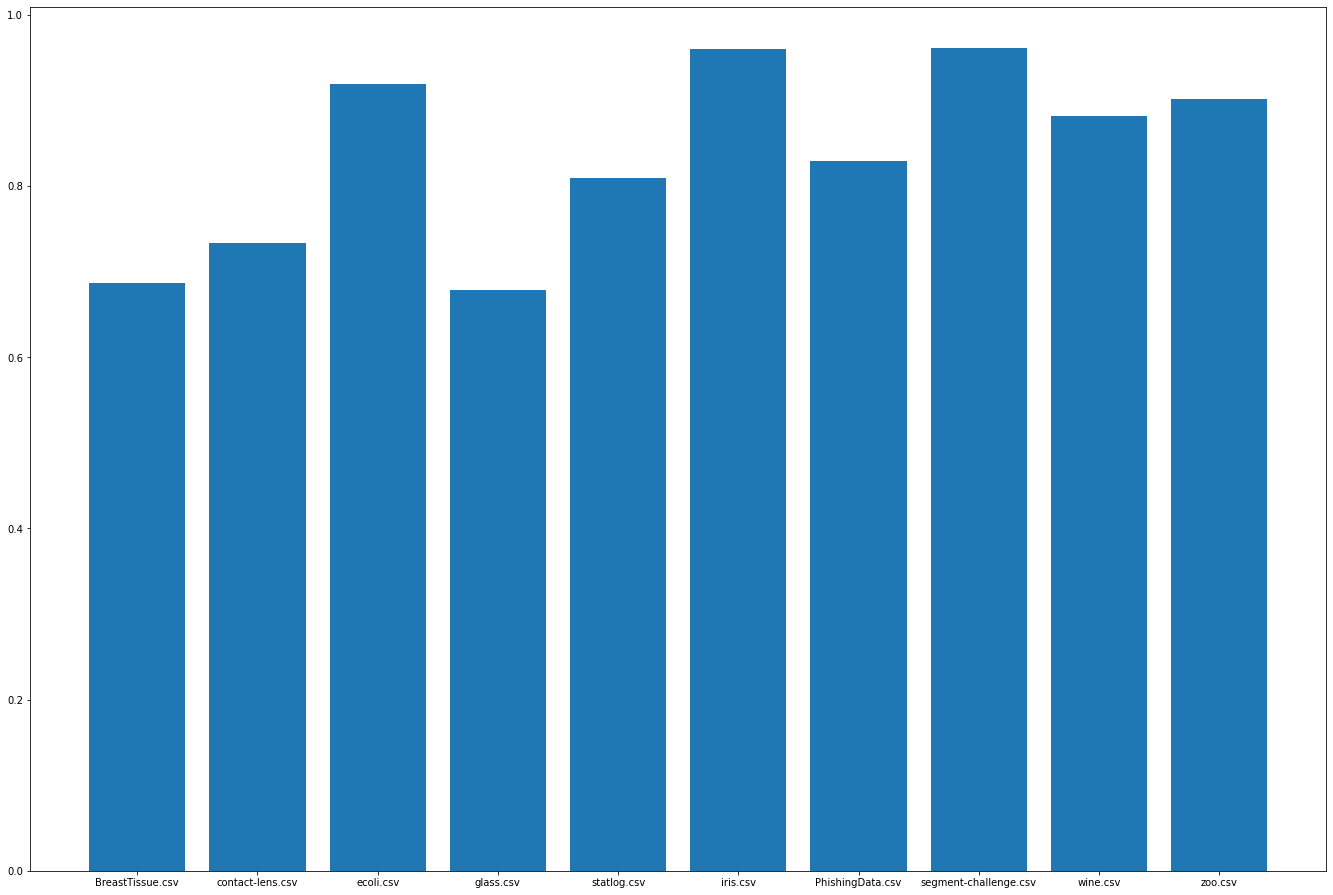

In [97]:
print(sol_arbol)
print(f"Media: {sum(sol_arbol) / len(sol_arbol)}")
ax = plt.figure().add_axes([0,0,3,3])
ax.bar(datasets, sol_arbol)
plt.show()

Como podemos ver, el clasificador produce resultados  realmente buenos en el dataset de iris y el dataset segment-challenge.

Sin embargo, en los datasets BreastTissue, contact-lens y glass los resultados no son óptimos. Para estos casos lo ideal sería modificar los distintos parámetros del clasificador, con el objetivo de buscar el mejor modelo para cada uno de los datasets.

En cualquier caso, se puede ver que de forma general el clasificador produce buenos resultados utilizando los parámetros predeterminados de árboles de decisión. Siendo la media de 0.83.

Vamos a observar ahora los resultados del clasificador k vecinos más cercanos.

[0.45636363636363636, 0.6166666666666666, 0.9344919786096255, 0.30476190476190473, 0.8624504301140871, 0.9666666666666668, 0.35236383442265795, 0.6346666666666667, 0.6973856209150326, 0.3254545454545455]
Media: 0.6151271950641489


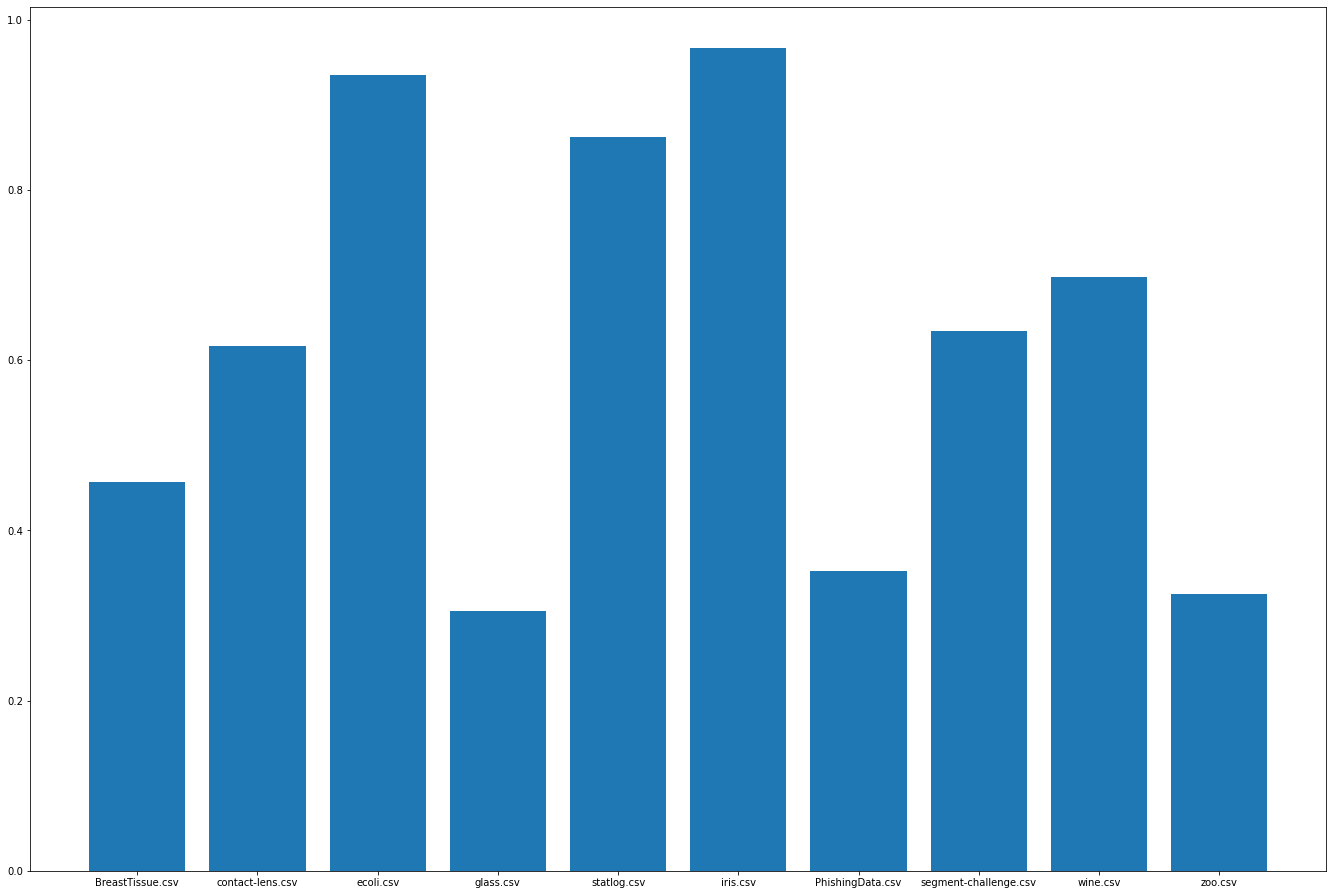

In [98]:
print(sol_vecinos)
print(f"Media: {sum(sol_vecinos) / len(sol_vecinos)}")
ax = plt.figure().add_axes([0,0,3,3])
ax.bar(datasets, sol_vecinos)
plt.show()

Con solo un vistazo podemos darnos cuenta de que los resultados son mucho peores que con el anterior clasificador. Esta vez, la media de los resultados es de 0.61.

Si observamos las barras podemos ver que hay una gran disparidad en los resultados de las distintas bases de datos. Por un lado, los datasets de iris y ecoli obtienen muy buenos resultados. Sin embargo, los datasets de glass, PhishingData y zoo obtienen unos resultados desastrosos, no llegando siquiera al 0.5. El resto de bases de datos se encuentran en una posición intermedia, pero siguen siendo unos resultados malos.

Es importante tener en cuenta que el clasificador de k vecinos más cercanos es muy costoso computacionalmente, siendo recomendable usarlo en datasets pequeños. Teniendo en cuenta los resultados, no parece ser un clasificador a tener en cuenta, al menos para estos datos. 

Por supuesto, los malos resultados pueden deberse al número de vecinos elegido, que en nuestro caso ha sido 10 sin ninguna razón en especial. Para aquellos datasets con malos resultados, habría que modificar este parámetro para obtener un mejor modelo.

Por último, vamos a ver los resultados del clasificador de máquinas de vectores soporte.

[0.7263636363636363, 0.6666666666666666, 0.9340463458110518, 0.6309523809523808, 0.8441736318711488, 0.9733333333333334, 0.8315522875816994, 0.9633333333333333, 0.9555555555555555, 0.96]
Media: 0.8485977171468806


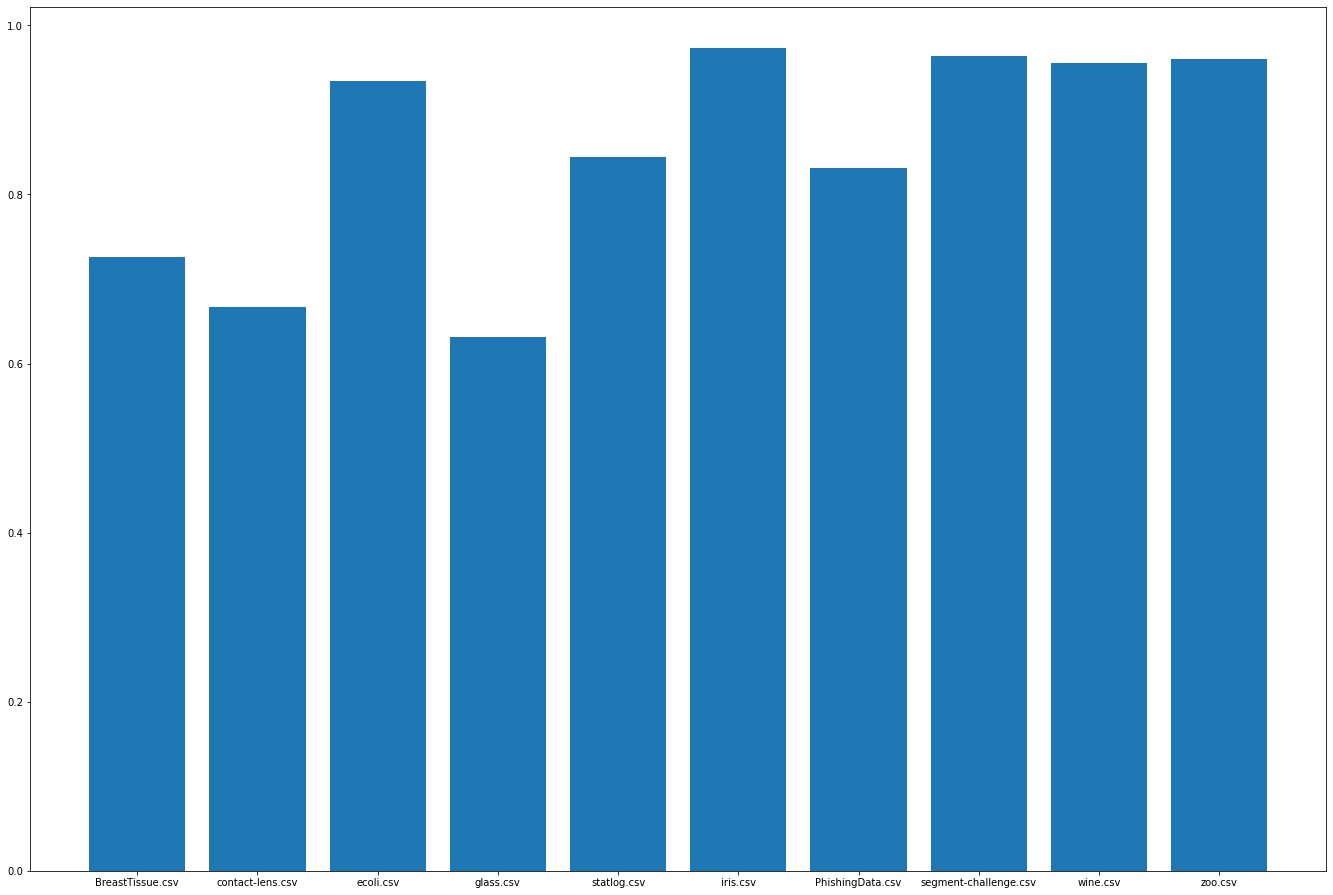

In [99]:
print(sol_svm)
print(f"Media: {sum(sol_svm) / len(sol_svm)}")
ax = plt.figure().add_axes([0,0,3,3])
ax.bar(datasets, sol_svm)
plt.show()

En el caso del svm, podemos ver que en la mitad de los datasets consigue obtener resultados realmente buenos. La media de los resultados es de 0.85, siendo esta ligeramente superior al clasificador de árboles de decisión. Esto implica que de los tres clasificadores, este es el que ofrece mejores resultados.

Realmente, la media sería mucho más alta si no fuera por los malos resultados que ofrece en los datasets de BreastTissue, contact-lens y glass. A pesar de ello, está claro que el clasificador svm es uno de los mejores clasificadores.

En nuestro caso, hemos usado un kernel lineal, que es el más simple. Sin embargo, podría utilizarse también un kernel rbf, el cuál contiene una gran potencia y podría mejorar resultados a algunos de los datasets, aunque, por supuesto, habría que comprobarlo. El parámetro C también sería recomendable modificarlo con el objetivo de encontrar el mejor modelo posible para cada uno de los datos.

### 4. Use el test de Wilcoxon de comparación de dos algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el rango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores.

Vamos a aplicar el test de Wilcoxon sobre los clasificadores de árboles de decisión y k vecinos cercanos.

In [108]:
from scipy.stats import wilcoxon

T1, p1 = wilcoxon(sol_arbol, sol_vecinos)

print(f"Valor de T: {T1}")
print(f"Valor de p: {p1}")

Valor de T: 6.0
Valor de p: 0.02734375


Vemos que el valor de p está por debajo de un nivel de confianza igual a 0.05. Por tanto, concluimos que existe una diferencia estadísticamente significativa entre los dos clasificadores.

Ahora vamos a obtener el rango de Friedman para los tres clasificadores.

In [109]:
from scipy.stats import friedmanchisquare

T2, p2 = friedmanchisquare(sol_arbol, sol_vecinos, sol_svm)

print(f"Valor de T: {T2}")
print(f"Valor de p: {p2}")

Valor de T: 6.200000000000003
Valor de p: 0.04504920239355775


Vemos que el valor de p también está por debajo de 0.05. Por tanto, este test concluye que existen diferencias significativas entre los tres clasificadores.

A continuación se muestra la representación de ambos test.

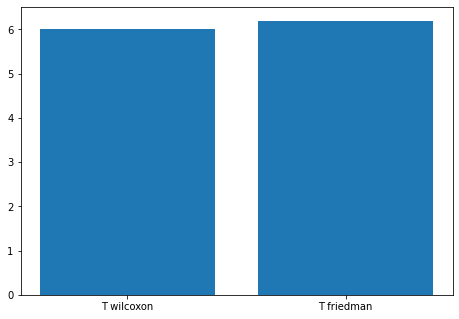

In [113]:
tests1 = ['T wilcoxon', 'T friedman']
tests2 = ['p wilcoxon', 'p friedman']
tests_resultados1 = [T1, T2]
tests_resultados2 = [p1, p2]

ax = plt.figure().add_axes([0,0,1,1])
ax.bar(tests1, tests_resultados1)
plt.show()

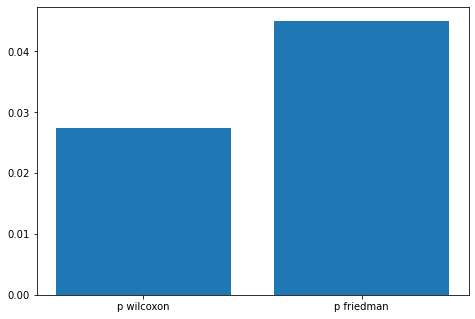

In [114]:
ax = plt.figure().add_axes([0,0,1,1])
ax.bar(tests2, tests_resultados2)
plt.show()

Por último, vamos a realizar el test de Iman y Davenport utilizando el resultado del test de Friedman.

In [116]:
from scipy.stats import f

davenport = ((10-1) * T2) / (10 * (3-1) - T2)

print(davenport)

if davenport > f.ppf(q=1-0.05, dfn=3-1, dfd=(3-1)*(10-1)):
    print("Existen diferencias.")
else:
    print("No existen diferencias significativas.")

4.043478260869568
Existen diferencias.


Este test confirma los resultados anteriores, y es que los tres clasificadores producen resultados significativamente diferentes para los 10 datasets que hemos escogido.

### 6. Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare su rendimiento con el método con hiperparámetros fijados a priori.
Vamos a escoger el clasificador de k vecinos más cercanos, con el objetivo de encontrar un modelo que mejore los resultados anteriores.

In [138]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

vecinos_grid = KNeighborsClassifier()

grid_values = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'p': [1, 2]
}

sol_vecinos_grid = list()

for i in datasets:
    df = pd.read_csv(i, header=None)
                            
    if i == 'wine.csv':
        X = df.iloc[:,1:].values
        Y = df.iloc[:,0].values
    else:
        X = df.iloc[:,:-1].values
        Y = df.iloc[:,-1].values
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
    
    sol_grid = GridSearchCV(vecinos_grid, param_grid=grid_values, scoring='accuracy')
    sol_grid.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, sol_grid.predict(X_test))
    sol_vecinos_grid.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [139]:
print(f"Media: {sum(sol_vecinos_grid) / len(sol_vecinos_grid)}")

Media: 0.7136456282749386


Como vemos, la media es de 0.71. Si recordamos, la media obtenida originalmente era de 0.61, por lo que los resultados han mejorado considerablemente. Además, no sólo han mejorado, sino que además han igualado al clasificador svm, que tenía la mejor media de los tres clasificadores.

Sería de esperar que si se realizara este mismo procedimiento para los otros dos clasificadores, sus medias mejoraran de la misma forma. Esto demuestra que este método de validación de hiperparámetros es bastante eficaz.